In [1]:
#dependencies
import pandas as pd
import numpy as np
import os
import csv
import matplotlib.pyplot as plt

In [2]:
#read in cleaned CSV file
austin311_df = pd.read_csv('All_Austin_311.csv',low_memory=False)
austin311_df.head()

,incident_zip,owning_department,complaint_description,complaint_type,latitude,longitude,year,month
0,78741,Animal Services Office,Loose Dog,ACLONAG,30.224549,-97.690675,2015,1
1,78757,Animal Services Office,Loose Dog,ACLONAG,30.350881,-97.747492,2016,5
2,78744,Animal Services Office,Loose Animal (not dog),ACLOANIM,30.199263,-97.711366,2014,1
3,78727,Austin Code Department,Austin Code - Request Code Officer,CODECOMP,30.425112,-97.707188,2014,11
4,78723,Animal Services Office,Animal - Proper Care,ACPROPER,30.311821,-97.669302,2014,7


In [3]:
#check out how many departments and how many complaints by department 
austin311_df['owning_department'].value_counts()

Animal Services Office                          83957
Austin Code Department                          77176
Transportation                                  73159
Austin Resource Recovery                        62241
Public Works                                    42409
Austin Energy Department                        17447
Parks & Recreation Department                   16111
Health & Human Services                         13759
Economic Development Department                 12078
Austin Water Utility                            10616
Watershed Protection                             9021
Public Health                                    3838
Austin Water                                      781
Neighborhood Housing & Community Development      120
Austin Fire Department                             63
Neighborhood Housing & Community                   50
Office of Emergency Management                      1
Name: owning_department, dtype: int64

In [4]:
#combine departments with nominal complaints into a category "other"
austin311_df['owning_department'] = austin311_df['owning_department'].str.replace("Public Health", "Other")
austin311_df['owning_department'] = austin311_df['owning_department'].str.replace("Austin Water", "Other")
austin311_df['owning_department'] = austin311_df['owning_department'].str.replace("Neighborhood Housing & Community Development", "Other")
austin311_df['owning_department'] = austin311_df['owning_department'].str.replace("Austin Fire Department", "Other")
austin311_df['owning_department'] = austin311_df['owning_department'].str.replace("Neighborhood Housing & Community", "Other")
austin311_df['owning_department'] = austin311_df['owning_department'].str.replace("Office of Emergency Management", "Other")

In [5]:
#recheck departments to verify new category "other"
austin311_df['owning_department'].value_counts()

Animal Services Office             83957
Austin Code Department             77176
Transportation                     73159
Austin Resource Recovery           62241
Public Works                       42409
Austin Energy Department           17447
Parks & Recreation Department      16111
Health & Human Services            13759
Economic Development Department    12078
Other Utility                      10616
Watershed Protection                9021
Other                               4853
Name: owning_department, dtype: int64

In [6]:
# Get current size of plots
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: 
print("Current size:", fig_size)

Current size: [6.0, 4.0]


In [7]:
# Set figure width to 12 and height to 9
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

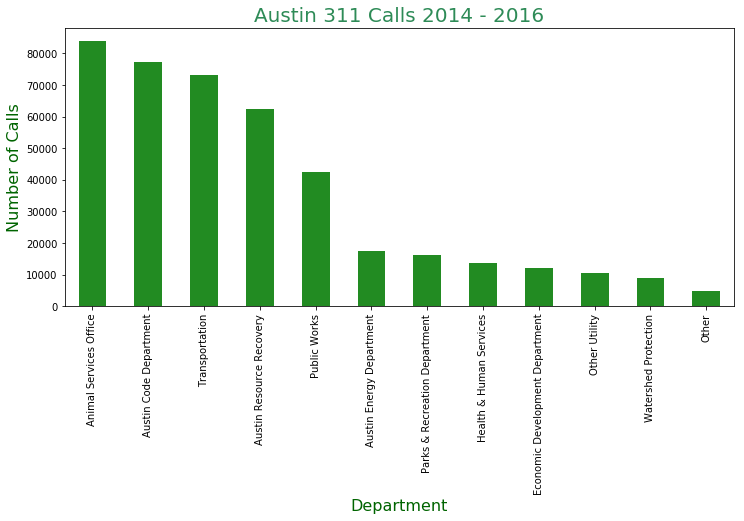

In [8]:
#plot this information on a bar graph to visualize the results 
pd.value_counts(austin311_df['owning_department']).plot.bar(color = "forestgreen")
plt.gcf().subplots_adjust(bottom=0.45)
plt.title('Austin 311 Calls 2014 - 2016', fontsize=20, color = "seagreen")
plt.xlabel('Department', fontsize=16, color = "darkgreen")
plt.ylabel('Number of Calls', fontsize=16, color = "darkgreen")
plt.savefig("overviewbydepartment.png")
plt.show()

In [9]:
# identify most common types of issues (count over 30000)
top_complaints = austin311_df.owning_department.value_counts().reset_index(name="count").query("count > 30000")["index"]
print(top_complaints)

0      Animal Services Office
1      Austin Code Department
2              Transportation
3    Austin Resource Recovery
4                Public Works
Name: index, dtype: object


In [10]:
# expland upon the specific types of the animal services information complaints (largest overall count from above)
animal_services = austin311_df[austin311_df['owning_department'].str.contains('Animal Services Office')]
animal_services.head()

,incident_zip,owning_department,complaint_description,complaint_type,latitude,longitude,year,month
0,78741,Animal Services Office,Loose Dog,ACLONAG,30.224549,-97.690675,2015,1
1,78757,Animal Services Office,Loose Dog,ACLONAG,30.350881,-97.747492,2016,5
2,78744,Animal Services Office,Loose Animal (not dog),ACLOANIM,30.199263,-97.711366,2014,1
4,78723,Animal Services Office,Animal - Proper Care,ACPROPER,30.311821,-97.669302,2014,7
5,78702,Animal Services Office,Animal - Proper Care,ACPROPER,30.272079,-97.708163,2016,6


In [11]:
#drill down to how many by type of commplaint
animal_services['complaint_description'].value_counts()

Loose Dog                              27352
Animal Control - Assistance Request    17857
Injured / Sick Animal                  13371
Animal - Proper Care                    4959
Wildlife Exposure                       4601
Animal Bite                             4048
Found Animal - Pick Up                  2811
Found Animal Report - Keep              2626
Dangerous/Vicious Dog Investigation     1674
Loose Animal Not Dog                    1344
Bat Complaint                            963
Coyote Complaints                        749
Animal In Vehicle                        744
Animal Trapped in Storm Drain            371
Loose Animal (not dog)                   336
Animal Roadside Sales                     77
Dangerous Animal - Except Dogs            69
zCoyote Complaints                         3
zz - Coyote Compliants                     1
Dead Bird                                  1
Name: complaint_description, dtype: int64

In [12]:
#combine coyote complaint types - likely typos
pd.options.mode.chained_assignment = None
animal_services['complaint_description'] = animal_services['complaint_description'].str.replace("zCoyote Complaints", "Coyote Complaints")
animal_services['complaint_description'] = animal_services['complaint_description'].str.replace("zz - Coyote Compliants", "Coyote Complaints")

In [13]:
#verify
animal_services['complaint_description'].value_counts()

Loose Dog                              27352
Animal Control - Assistance Request    17857
Injured / Sick Animal                  13371
Animal - Proper Care                    4959
Wildlife Exposure                       4601
Animal Bite                             4048
Found Animal - Pick Up                  2811
Found Animal Report - Keep              2626
Dangerous/Vicious Dog Investigation     1674
Loose Animal Not Dog                    1344
Bat Complaint                            963
Coyote Complaints                        753
Animal In Vehicle                        744
Animal Trapped in Storm Drain            371
Loose Animal (not dog)                   336
Animal Roadside Sales                     77
Dangerous Animal - Except Dogs            69
Dead Bird                                  1
Name: complaint_description, dtype: int64

In [14]:
#further cleaning  - duplicate columns due to input error and to consolidate small categories to "other"
animal_services['complaint_description'] = animal_services['complaint_description'].str.replace("Animal Roadside Sales", "Other")
animal_services['complaint_description'] = animal_services['complaint_description'].str.replace("Dangerous Animal - Except Dogs", "Other")
animal_services['complaint_description'] = animal_services['complaint_description'].str.replace("Dead Bird", "Other")
animal_services['complaint_description'] = animal_services['complaint_description'].str.replace("Loose Animal (not dog)", "Other")


In [15]:
#recheck to verify corrections and consolidation
animal_services['complaint_description'].value_counts()

Loose Dog                              27352
Animal Control - Assistance Request    17857
Injured / Sick Animal                  13371
Animal - Proper Care                    4959
Wildlife Exposure                       4601
Animal Bite                             4048
Found Animal - Pick Up                  2811
Found Animal Report - Keep              2626
Dangerous/Vicious Dog Investigation     1674
Loose Animal Not Dog                    1344
Bat Complaint                            963
Coyote Complaints                        753
Animal In Vehicle                        744
Animal Trapped in Storm Drain            371
Loose Animal (not dog)                   336
Other                                    147
Name: complaint_description, dtype: int64

In [16]:
#top zip codes with the most animal services complaints (> 3000)
animal_services.incident_zip.value_counts().reset_index(name="count").query("count > 3000")["index"]

0    78744
1    78745
2    78741
3    78753
4    78758
5    78704
6    78702
7    78723
8    78748
9    78724
Name: index, dtype: int64

In [17]:
# check most common types of animal complaints (count over 3000)
topanimal_complaints = animal_services.complaint_description.value_counts().reset_index(name="count").query("count > 3000")["index"]
print(topanimal_complaints)

0                              Loose Dog
1    Animal Control - Assistance Request
2                  Injured / Sick Animal
3                   Animal - Proper Care
4                      Wildlife Exposure
5                            Animal Bite
Name: index, dtype: object


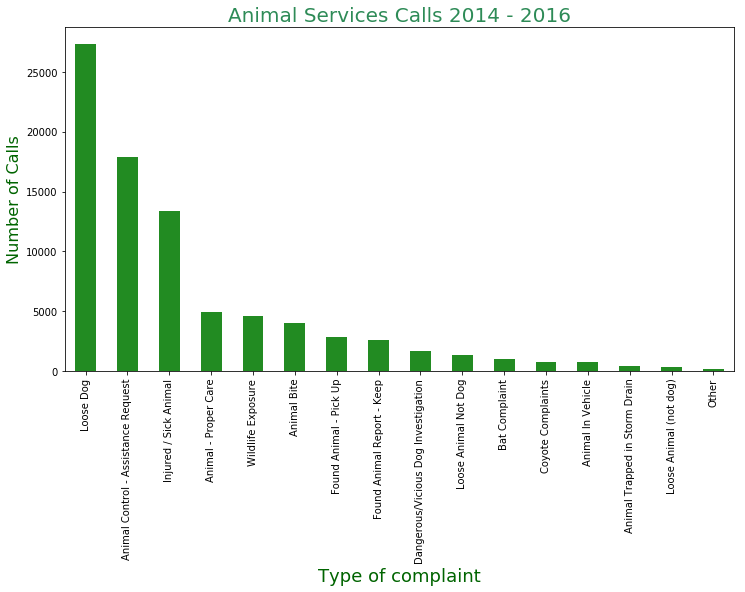

In [18]:
#plot the Animal Services data
pd.value_counts(animal_services['complaint_description']).plot.bar(color = "forestgreen")
plt.gcf().subplots_adjust(bottom=0.35)
plt.title('Animal Services Calls 2014 - 2016', fontsize=20, color = "seagreen")
plt.xlabel('Type of complaint', fontsize=18, color = "darkgreen")
plt.ylabel('Number of Calls', fontsize=16, color = "darkgreen")
plt.savefig("overviewanimalservices.png")
plt.show()

In [19]:
#code department info
code_department = austin311_df[austin311_df['owning_department'].str.contains('Austin Code Department')]
code_department.head()

,incident_zip,owning_department,complaint_description,complaint_type,latitude,longitude,year,month
3,78727,Austin Code Department,Austin Code - Request Code Officer,CODECOMP,30.425112,-97.707188,2014,11
6,78744,Austin Code Department,Austin Code - Request Code Officer,CODECOMP,30.178479,-97.763169,2015,8
9,78759,Austin Code Department,Austin Code - Request Code Officer,CODECOMP,30.429089,-97.765658,2017,8
12,78701,Austin Code Department,Austin Code - Request Code Officer,CODECOMP,30.261816,-97.741129,2016,8
17,78705,Austin Code Department,Austin Code - Request Code Officer,CODECOMP,30.286623,-97.748503,2016,9


In [20]:
#Check types and numbers of code complaints
code_department['complaint_description'].value_counts()

Austin Code - Request Code Officer                   71861
Austin Code - Signs/Billboards                        2345
Austin Code - Short Term Rental Complaint SR          1691
Austin Code - Short Term Rental (STR) Appointment      804
Short Term Rental Complaint SR                         278
Austin Code - Construction Ordinance SR                158
Austin Code - Construction Rest Break Complaint         36
Austin Code - Woodridge Apt                              2
Code Compliance - Signs/Billboards                       1
Name: complaint_description, dtype: int64

In [21]:
#further cleaning  - duplicate columns due to input error
code_department['complaint_description'] = code_department['complaint_description'].str.replace("Austin Code - ", "")
code_department['complaint_description'] = code_department['complaint_description'].str.replace("Code Compliance - ", "")


In [22]:
#Verify 
code_department['complaint_description'].value_counts()

Request Code Officer                   71861
Signs/Billboards                        2346
Short Term Rental Complaint SR          1969
Short Term Rental (STR) Appointment      804
Construction Ordinance SR                158
Construction Rest Break Complaint         36
Woodridge Apt                              2
Name: complaint_description, dtype: int64

In [23]:
#top zip codes with the most code department complaints (> 3000)
code_department.incident_zip.value_counts().reset_index(name="count").query("count > 3000")["index"]

0    78745
1    78723
2    78758
3    78753
4    78702
5    78704
6    78741
7    78744
Name: index, dtype: int64

In [24]:
# most common types of code complaints (count over 100)
topcode_complaints = code_department.complaint_description.value_counts().reset_index(name="count").query("count > 100")["index"]
print(topcode_complaints)

0                   Request Code Officer
1                       Signs/Billboards
2         Short Term Rental Complaint SR
3    Short Term Rental (STR) Appointment
4              Construction Ordinance SR
Name: index, dtype: object


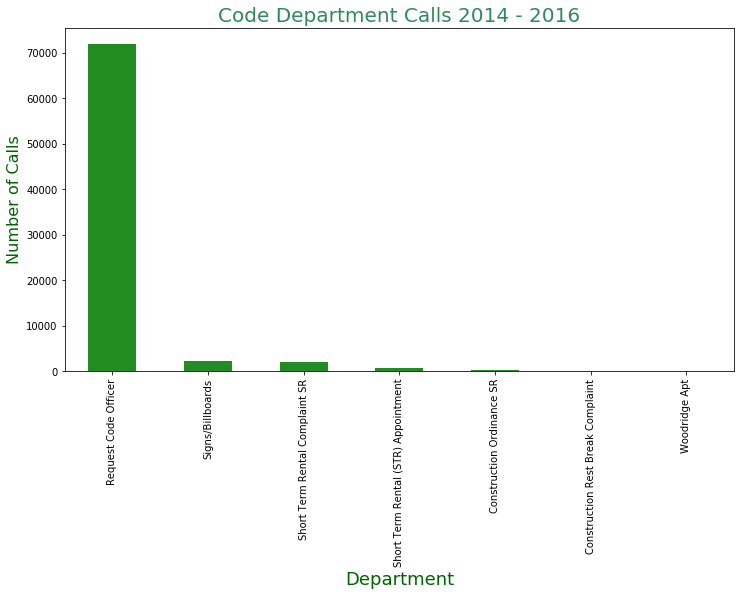

In [25]:
#plot Code Department data
pd.value_counts(code_department['complaint_description']).plot.bar(color = "forestgreen")
plt.gcf().subplots_adjust(bottom=0.35)
plt.title('Code Department Calls 2014 - 2016', fontsize=20, color = "seagreen")
plt.xlabel('Department', fontsize=18, color = "darkgreen")
plt.ylabel('Number of Calls', fontsize=16, color = "darkgreen")
plt.savefig("overviewcodedepartment.png")
plt.show()

In [26]:
#transportation department information
transportation = austin311_df[austin311_df['owning_department'].str.contains('Transportation')]
transportation.head()

,incident_zip,owning_department,complaint_description,complaint_type,latitude,longitude,year,month
13,78702,Transportation,Sign - Traffic Sign Emergency,SIGNTRAF,30.256105,-97.718914,2014,5
20,78742,Transportation,Traffic Signal - Maintenance,TRASIGMA,30.236827,-97.686029,2014,12
27,78701,Transportation,Traffic Signal - Maintenance,TRASIGMA,30.263381,-97.744572,2016,3
29,78703,Transportation,Traffic Signal - Maintenance,TRASIGMA,30.283211,-97.776779,2016,7
36,78751,Transportation,Traffic Signal - Dig Tess Request,TRAFFI10,30.318741,-97.726349,2014,12


In [27]:
#Check types and numbers of transportation complaints
transportation['complaint_description'].value_counts()

Traffic Signal - Maintenance                26071
Traffic Signal - Dig Tess Request            8757
Sign - New                                   4230
Sign - Traffic Sign Maintenance              4169
Sign - Traffic Sign Emergency                3511
Parking Machine Issue                        3095
Concerns in the ROW                          2560
View Obstruction at Intersection             2289
Traffic Signal - New/Change                  2140
Sign - Street Name                           2056
Road Markings/Striping - Maintenance         1787
Sign - Parking Sign Maintenance              1505
Traffic Engineering - General                1379
Traffic Calming                              1257
School Zone Flasher - Timing/Maintenance     1189
Road Markings/Striping - New                 1060
Bicycle Issues                                997
Construction Items- ROW                       938
Lane/Road Closure Notification                909
Construction items in ROW                     863


In [28]:
#consolidate all "right of way" concerns
transportation['complaint_description'] = transportation['complaint_description'].str.replace("Newspaper Rack- ROW", "Right of Way Concerns")
transportation['complaint_description'] = transportation['complaint_description'].str.replace("Filming Permit - ROW", "Right of Way Concerns")
transportation['complaint_description'] = transportation['complaint_description'].str.replace("Utility Coordination - ROW", "Right of Way Concerns")
transportation['complaint_description'] = transportation['complaint_description'].str.replace("Valet Permit - ROW", "Right of Way Concerns")
transportation['complaint_description'] = transportation['complaint_description'].str.replace("Parking Permit- ROW", "Right of Way Concerns")
transportation['complaint_description'] = transportation['complaint_description'].str.replace("Vendor Permit - ROW", "Right of Way Concerns")
transportation['complaint_description'] = transportation['complaint_description'].str.replace("Construction/Permitting- ROW", "Right of Way Concerns")
transportation['complaint_description'] = transportation['complaint_description'].str.replace("Construction items in ROW", "Right of Way Concerns")
transportation['complaint_description'] = transportation['complaint_description'].str.replace("Concerns in the ROW", "Right of Way Concerns")

In [29]:
#verify
transportation['complaint_description'].value_counts()

Traffic Signal - Maintenance                26071
Traffic Signal - Dig Tess Request            8757
Sign - New                                   4230
Sign - Traffic Sign Maintenance              4169
Right of Way Concerns                        3674
Sign - Traffic Sign Emergency                3511
Parking Machine Issue                        3095
View Obstruction at Intersection             2289
Traffic Signal - New/Change                  2140
Sign - Street Name                           2056
Road Markings/Striping - Maintenance         1787
Sign - Parking Sign Maintenance              1505
Traffic Engineering - General                1379
Traffic Calming                              1257
School Zone Flasher - Timing/Maintenance     1189
Road Markings/Striping - New                 1060
Bicycle Issues                                997
Construction Items- ROW                       938
Lane/Road Closure Notification                909
Sidewalk/Curb Ramp/Route - NEW                761


In [30]:
#consolidate insignificant numbers of individual complaint types to "other"
transportation['complaint_description'] = transportation['complaint_description'].str.replace("Emergency Road Closure Report", "Other")
transportation['complaint_description'] = transportation['complaint_description'].str.replace("Traffic Engineering - Jurisdiction Issue", "Other")
transportation['complaint_description'] = transportation['complaint_description'].str.replace("Residential Parking Permit Enforcement", "Other")

In [31]:
#Verify
transportation['complaint_description'].value_counts()

Traffic Signal - Maintenance                26071
Traffic Signal - Dig Tess Request            8757
Sign - New                                   4230
Sign - Traffic Sign Maintenance              4169
Right of Way Concerns                        3674
Sign - Traffic Sign Emergency                3511
Parking Machine Issue                        3095
View Obstruction at Intersection             2289
Traffic Signal - New/Change                  2140
Sign - Street Name                           2056
Road Markings/Striping - Maintenance         1787
Sign - Parking Sign Maintenance              1505
Traffic Engineering - General                1379
Traffic Calming                              1257
School Zone Flasher - Timing/Maintenance     1189
Road Markings/Striping - New                 1060
Bicycle Issues                                997
Construction Items- ROW                       938
Lane/Road Closure Notification                909
Sidewalk/Curb Ramp/Route - NEW                761


In [32]:
#top zip codes with the most transportation complaints (> 3000)
transportation.incident_zip.value_counts().reset_index(name="count").query("count > 3000")["index"]

0    78701
1    78704
2    78745
3    78702
4    78758
5    78703
6    78723
Name: index, dtype: int64

In [33]:
# most common types of transportation complaints (count over 3000)
toptrans_complaints = transportation.complaint_description.value_counts().reset_index(name="count").query("count > 3000")["index"]
print(toptrans_complaints)

0         Traffic Signal - Maintenance
1    Traffic Signal - Dig Tess Request
2                           Sign - New
3      Sign - Traffic Sign Maintenance
4                Right of Way Concerns
5        Sign - Traffic Sign Emergency
6                Parking Machine Issue
Name: index, dtype: object


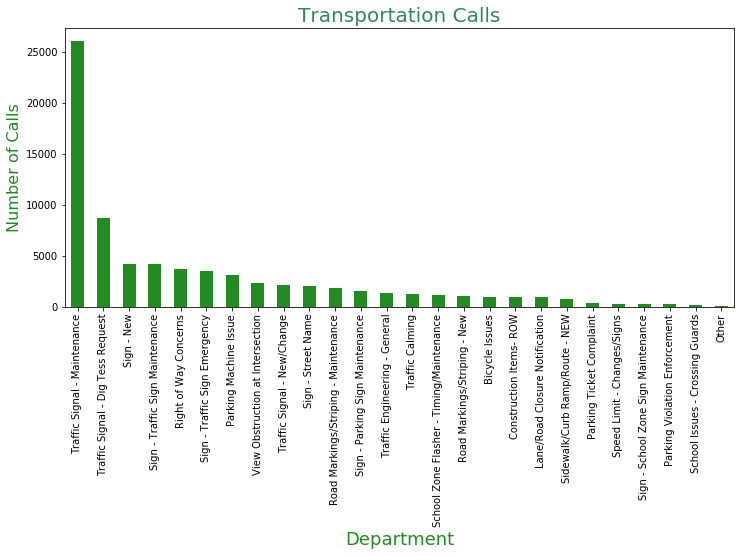

In [34]:
#Plot the transportation calls
pd.value_counts(transportation['complaint_description']).plot.bar(color = "forestgreen")
plt.gcf().subplots_adjust(bottom=0.45)
plt.title('Transportation Calls', fontsize=20, color= "seagreen")
plt.xlabel('Department', fontsize=18, color = "forestgreen")
plt.ylabel('Number of Calls', fontsize=16, color = "forestgreen")
plt.savefig("overviewtransportation.png")
plt.show()

In [35]:
#Resource Recovery department information
resource_recovery = austin311_df[austin311_df['owning_department'].str.contains('Austin Resource Recovery')]
resource_recovery.head()

,incident_zip,owning_department,complaint_description,complaint_type,latitude,longitude,year,month
43,78721,Austin Resource Recovery,ARR Missed Recycling,SWSRECYC,30.278679,-97.690474,2016,3
55,78731,Austin Resource Recovery,ARR Dead Animal Collection,SWSDEADA,30.367478,-97.759874,2017,6
56,78758,Austin Resource Recovery,ARR Street Sweeping,SWSSTSWE,30.393850,-97.717670,2017,6
60,78757,Austin Resource Recovery,ARR Missed Recycling,SWSRECYC,30.351236,-97.724405,2017,6
72,78727,Austin Resource Recovery,ARR Dead Animal Collection,SWSDEADA,30.412723,-97.722786,2015,6


In [36]:
# Check number of each type of Resource Recovery complaint
resource_recovery['complaint_description'].value_counts()

ARR Missed Recycling                                 20358
ARR Dead Animal Collection                           19406
ARR Missed Yard Trimmings /Organics                  12733
ARR Brush and Bulk                                    5066
ARR Street Sweeping                                   2441
Austin Code - Request Code Officer                    1667
ARR Missed Yard Trimmings/Compost                      175
Ordinance Universal Recycling                          103
Austin Code - Signs/Billboards                          95
Austin Code - Short Term Rental (STR) Appointment       92
Ordinance Single-Use Carryout Bags                      63
ARR Dumpster                                            41
Austin Code - Construction Ordinance SR                  1
Name: complaint_description, dtype: int64

In [37]:
#resource recovery also needs further cleaning
resource_recovery['complaint_description'] = resource_recovery['complaint_description'].str.replace("Austin Code - ", "")
resource_recovery['complaint_description'] = resource_recovery['complaint_description'].str.replace("ARR ", "")

In [38]:
#Verify
resource_recovery['complaint_description'].value_counts()

Missed Recycling                       20358
Dead Animal Collection                 19406
Missed Yard Trimmings /Organics        12733
Brush and Bulk                          5066
Street Sweeping                         2441
Request Code Officer                    1667
Missed Yard Trimmings/Compost            175
Ordinance Universal Recycling            103
Signs/Billboards                          95
Short Term Rental (STR) Appointment       92
Ordinance Single-Use Carryout Bags        63
Dumpster                                  41
Construction Ordinance SR                  1
Name: complaint_description, dtype: int64

In [39]:
#Remove Short Term Rental appointment as it appears to be entered incorrectly (should be under Code Department) and verify
resource_recovery = resource_recovery[~resource_recovery["complaint_description"].isin(["Short Term Rental (STR) Appointment"])]
resource_recovery["complaint_description"].value_counts()

Missed Recycling                      20358
Dead Animal Collection                19406
Missed Yard Trimmings /Organics       12733
Brush and Bulk                         5066
Street Sweeping                        2441
Request Code Officer                   1667
Missed Yard Trimmings/Compost           175
Ordinance Universal Recycling           103
Signs/Billboards                         95
Ordinance Single-Use Carryout Bags       63
Dumpster                                 41
Construction Ordinance SR                 1
Name: complaint_description, dtype: int64

In [40]:
#resource_recovery consolidate small types to "other"
resource_recovery['complaint_description'] = resource_recovery['complaint_description'].str.replace("Construction Ordinance SR", "Other")
resource_recovery['complaint_description'] = resource_recovery['complaint_description'].str.replace("Dumpster", "Other")
resource_recovery['complaint_description'] = resource_recovery['complaint_description'].str.replace("Ordinance Single-Use Carryout Bags", "Other")
resource_recovery['complaint_description'] = resource_recovery['complaint_description'].str.replace("Signs/Billboards", "Other")
resource_recovery['complaint_description'] = resource_recovery['complaint_description'].str.replace("Ordinance Universal Recycling", "Other")
resource_recovery['complaint_description'] = resource_recovery['complaint_description'].str.replace("Construction Ordinance SR", "Other")
resource_recovery['complaint_description'] = resource_recovery['complaint_description'].str.replace("Missed Yard Trimmings/Compost", "Other")

In [41]:
#Verify
resource_recovery['complaint_description'].value_counts()

Missed Recycling                   20358
Dead Animal Collection             19406
Missed Yard Trimmings /Organics    12733
Brush and Bulk                      5066
Street Sweeping                     2441
Request Code Officer                1667
Other                                478
Name: complaint_description, dtype: int64

In [42]:
#top number of complaints by zip (> 3000)
resource_recovery.incident_zip.value_counts().reset_index(name="count").query("count > 3000")["index"]

0    78745
1    78704
2    78702
3    78759
4    78748
5    78731
6    78744
Name: index, dtype: int64

In [43]:
# most common types of resource recovery complaints (count over 1000)
topresource_complaints = resource_recovery.complaint_description.value_counts().reset_index(name="count").query("count > 1000")["index"]
print(topresource_complaints)

0                   Missed Recycling
1             Dead Animal Collection
2    Missed Yard Trimmings /Organics
3                     Brush and Bulk
4                    Street Sweeping
5               Request Code Officer
Name: index, dtype: object


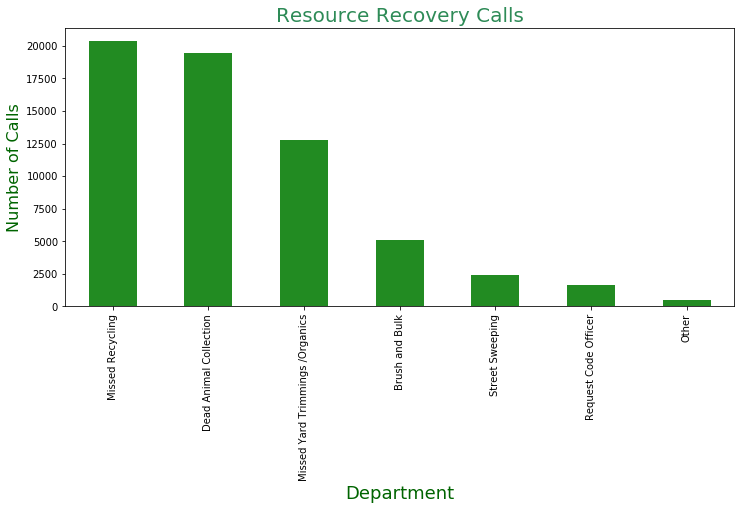

In [44]:
#plot resource recovery calls
pd.value_counts(resource_recovery['complaint_description']).plot.bar(color = "forestgreen")
plt.gcf().subplots_adjust(bottom=0.45)
plt.title('Resource Recovery Calls', fontsize=20, color = "seagreen")
plt.xlabel('Department', fontsize=18, color = "darkgreen")
plt.ylabel('Number of Calls', fontsize=16, color = "darkgreen")
plt.savefig("overviewresourcerecovery.png")
plt.show()

In [45]:
#Review Public works complaints
public_works = austin311_df[austin311_df['owning_department'].str.contains('Public Works')]
public_works.head()

,incident_zip,owning_department,complaint_description,complaint_type,latitude,longitude,year,month
11,78702,Public Works,Pavement Failure,SBPAVEFA,30.251916,-97.704277,2016,3
37,78704,Public Works,Obstruction in ROW,OBSTMIDB,30.250338,-97.750677,2015,6
38,78705,Public Works,Curb/Gutter Repair,SBCURBGU,30.296566,-97.735247,2016,10
44,78753,Public Works,Pothole Repair,SBPOTREP,30.359977,-97.691842,2014,2
51,78704,Public Works,Tree Issue ROW/Emergency (PW),PRTRROWE,30.260343,-97.755710,2016,4


In [46]:
#type and number of public works complaints
public_works['complaint_description'].value_counts()

Pothole Repair                        9088
Debris in Street                      5986
Obstruction in ROW                    5387
Tree Issue ROW/Maintenance (PW)       4791
Tree Issue ROW/Emergency (PW)         4233
Sidewalk Repair                       3604
Pavement Failure                      3214
Alley & Unpaved Street Maintenance    1565
Mowing Medians                        1563
Curb/Gutter Repair                     725
Street Resurfacing Inquiry             691
School Zone - New/Review/Changes       349
Guardrail Repair                       301
Barricade Request                      213
Sidewalk/Curb Ramp/Route - NEW         183
Bridge Repair                          134
Roadway Spillage                       112
Bicycle Issues                          97
Road Sanding Request                    53
Guardrail - New                         34
Tree Issue ROW/Maintenance (PARD)       28
School Issues - Crossing Guards         26
Tree Issue ROW/Emergency (PARD)         24
Fence Repai

In [47]:
#top number of complaints by zip (> 2000)
public_works.incident_zip.value_counts().reset_index(name="count").query("count > 2000")["index"]

0    78745
1    78704
2    78702
3    78703
4    78744
5    78705
Name: index, dtype: int64

In [48]:
# most common types of public works complaints (count over 1000)
topworks_complaints = public_works.complaint_description.value_counts().reset_index(name="count").query("count > 1000")["index"]
print(topworks_complaints)

0                        Pothole Repair
1                      Debris in Street
2                    Obstruction in ROW
3       Tree Issue ROW/Maintenance (PW)
4         Tree Issue ROW/Emergency (PW)
5                       Sidewalk Repair
6                      Pavement Failure
7    Alley & Unpaved Street Maintenance
8                        Mowing Medians
Name: index, dtype: object


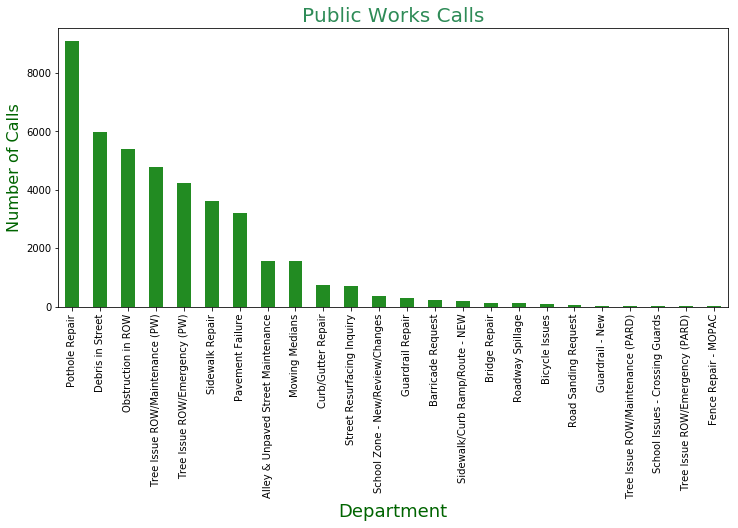

In [49]:
#plot public works complaints
pd.value_counts(public_works['complaint_description']).plot.bar(color = "forestgreen")
plt.gcf().subplots_adjust(bottom=0.45)
plt.title('Public Works Calls', fontsize=20, color = "seagreen")
plt.xlabel('Department', fontsize=18, color = "darkgreen")
plt.ylabel('Number of Calls', fontsize=16, color = "darkgreen")
plt.savefig("overviewpublicworks.png")
plt.show()